# ASSIGNMENT 2
## PART 2: PICTURE ANALYST

### 1. IMPORT CÁC THƯ VIỆN
Bên cạnh các thư viện thường sử dụng như numpy, pandas và matplotlib, OpenCV được sử dụng như một thư viện xử lý hình ảnh ra mảng array

In [63]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline

### 2. THỰC HIỆN HÀM GET_DOG_CAT_DATA
Sử dụng OpenCV(CV2) để thực hiện load dữ liệu ảnh ra và r

In [64]:
from matplotlib.image import imread
import os

def get_cat_dog_data(folder, image_size):
    """
    Get the cat dog data
    Inputs: folder: The folder path
            image_size: Resize all the image sizes to image_size
    
    Output: images, labels numpy array
    """
    images, labels = [], []
    
    for file in os.listdir(folder):
        # Load photo from path "os.path.join(folder, file)":
        image_data = cv2.imread(os.path.join(folder, file))

        # Change the image size to "(image_size, image_size)""
        image_data = cv2.resize(image_data, (image_size, image_size))

        # Append the data to the list:
        images.append(image_data)
        # Append the data of dog or cat into the list of labels. If it is dog, the label is 1 otherwise it is 0.
        if 'cat' in file:
            labels.append(0)
        else:
            labels.append(1)
        
    return np.array(images), np.array(labels) 

images, label = get_cat_dog_data('dogs-vs-cats/train/', 28)

In [65]:
print(images.shape)
images[0]

(25000, 28, 28, 3)


array([[[ 93, 170, 209],
        [105, 183, 226],
        [115, 193, 236],
        ...,
        [158, 229, 249],
        [148, 222, 250],
        [129, 209, 246]],

       [[ 96, 169, 213],
        [102, 177, 221],
        [108, 187, 230],
        ...,
        [168, 234, 253],
        [146, 220, 248],
        [139, 217, 246]],

       [[ 95, 168, 212],
        [101, 176, 220],
        [103, 178, 222],
        ...,
        [168, 233, 254],
        [149, 223, 251],
        [150, 221, 248]],

       ...,

       [[ 66, 137, 174],
        [ 69, 140, 177],
        [ 50, 114, 145],
        ...,
        [  2,   7,   8],
        [  4,  14,  14],
        [  1,  10,  13]],

       [[ 62, 133, 167],
        [ 67, 137, 174],
        [ 51, 121, 151],
        ...,
        [  1,   6,   5],
        [  2,   7,   6],
        [  1,   6,   5]],

       [[ 56, 126, 160],
        [ 61, 132, 169],
        [ 56, 126, 156],
        ...,
        [  0,   3,   2],
        [  0,   4,   3],
        [  0,   4,   3]]

In [66]:
label.shape

(25000,)

##### In một số hình ảnh

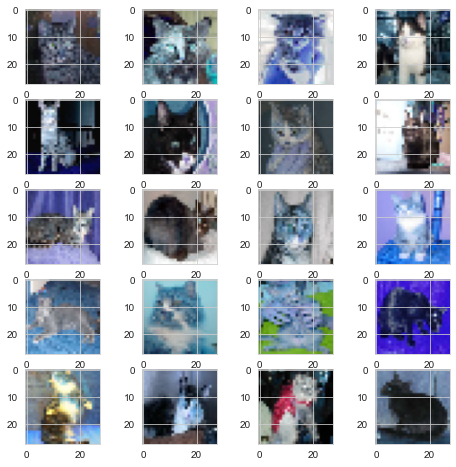

In [67]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i])
plt.show()

### 3. Tiền xử lý (Pre-processing) hình ảnh
 Hình ảnh được scaled với array3D, cần scale lại về array1D với kích thước 2352 sau đó chia cho 255 để có dữ liệu điểm ảnh trong dải [0:1]. Mục đích để xử dụng CV2 cho phương pháp này
Note: 
* reshape(-1) sẽ thay thế mảng gốc
*  flatten() không thay thế mảng gốc và tạo ra 1 bản copy. 
Tùy mục đích sử dụng là chạy chương trình liên tục ko cần back lại mà sử dụng hai phương án này

In [68]:
images = np.array([i.reshape(-1) for i in images], )
images.shape

(25000, 2352)

In [70]:
images_scaled = images / 255
print(images_scaled.shape)
images_scaled[1]

(25000, 2352)


array([0.15686275, 0.14509804, 0.12941176, ..., 0.12941176, 0.14901961,
       0.20784314])

### 4. Đào tạo mô hình với train, test
#### 4.1 Tách (Split out) train và test data 

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_scaled, label, train_size=0.9, test_size=0.1)

In [78]:
print('Number of Dogs in train dataset:', len(y_train[y_train == 1]))
print('Number of Cats in train dataset:', len(y_train[y_train == 0]))
print('Number of Dogs in test dataset:', len(y_test[y_test == 1]))
print('Number of Cats in test dataset:', len(y_test[y_test == 0]))

Number of Dogs in train dataset: 11238
Number of Cats in train dataset: 11262
Number of Dogs in test dataset: 1262
Number of Cats in test dataset: 1238


#### 4.2 Đào tạo mô hình sử dụng MLP như hướng dẫn và tính toán sai số

In [96]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, activation='relu', hidden_layer_sizes=(64,64), random_state=1).fit(X_train, y_train)

C:\2_PYTHON\PyLIB\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
print('Train accuracy: ', clf.score(X_train, y_train))

Train accuracy:  0.9404


In [101]:
print('Test accuracy: ', clf.score(X_test, y_test))

Test accuracy:  0.6252


**Quizz:** What is the accuracy of the model on the train set ?
<br>
**Answer: 0.9404**
<br>
**Quizz:** What is the accuracy of the model on the test set ?
<br>
**Answer: 0.6202**

In [98]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of Predictions:', accuracy)

Accuracy of Predictions: 0.6252


#### 4.3 Sử dụng F1 Score

In [102]:
from sklearn.metrics import f1_score

y_test_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_test_pred, average='micro')

print ("Test f1: {:.2f}".format(f1))

Test f1: 0.63


##### Kết luận
* The f1 score cho kết quả giống với accuracy score do đó không có gì cải tiến với việc sử dụng hàm này